## 5.2 有监督特征抽取

**基础知识**

In [1]:
from sklearn.datasets.samples_generator import make_classification
X,y = make_classification(n_samples=1000,
                          n_features=4,
                          n_redundant=0,
                          n_classes=3,
                          n_clusters_per_class=1,
                          class_sep=0.5,
                          random_state=10)
X.shape, y.shape

((1000, 4), (1000,))

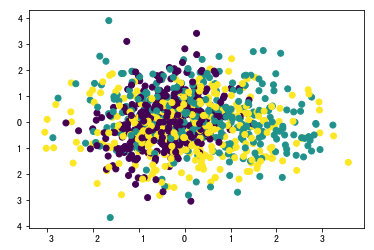

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)

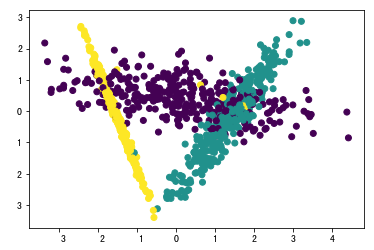

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y)

**项目案例**

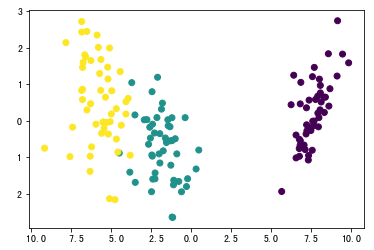

In [5]:
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
iris = datasets.load_iris()
X_iris, y_iris= iris.data, iris.target
lda = LinearDiscriminantAnalysis(n_components=2)
X_iris_lda = lda.fit_transform(X_iris, y_iris)
plt.scatter(X_iris_lda[:, 0], X_iris_lda[:, 1], c=y_iris)

In [6]:
import numpy as np
X_mean = []
X_var = []
for i in range(4):
    m = []
    v = []
    for j in range(3):
        m.append(np.mean(X[:, i][j==y]))
        v.append(np.var(X[:, i][j==y]))
    X_mean.append(v)#X_var = np.var(X, axis=0)
    X_var.append(m)
print("X_mean: ", X_mean)
print("X_var: ", X_var)

X_mean:  [[0.2183712580305977, 1.1052626159191397, 0.4057388127038256], [1.061062843407683, 1.050045165331185, 1.0287851089775246], [0.9874712352883422, 0.9682431042431385, 1.0036869489851274], [0.7034263353290686, 0.5892565808874551, 1.0390892157973233]]
X_var:  [[-0.5278067685825016, -0.5169064671104584, 0.4672757741731266], [0.061662385983550616, -0.17231056591994068, 0.08946387250298174], [-0.014067167509643446, -0.07051190168141928, 0.0039673167895780004], [0.45836039396857386, -0.46246572782720174, 0.5115950547496408]]


In [7]:
X_mean[0]

[0.2183712580305977, 1.1052626159191397, 0.4057388127038256]

In [8]:
X_var[0]

[-0.5278067685825016, -0.5169064671104584, 0.4672757741731266]

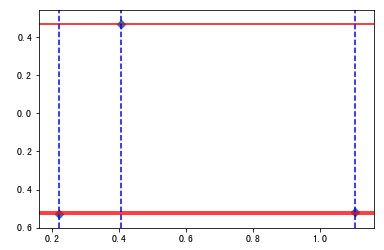

In [9]:
fig, axs = plt.subplots()
for i in range(3):
    axs.axhline(X_var[0][i], color='red')
    axs.axvline(X_mean[0][i], color='blue', linestyle="--")
axs.scatter(X_mean[0], X_var[0], marker="D")

**动手练习**

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
path = "/Users/qiwsir/Documents/Codes/DataSet"
df_wine = pd.read_csv(path + "/winemag/wine_data.csv")
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [11]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

lr = LogisticRegression()
lr = lr.fit(X_train_lda, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


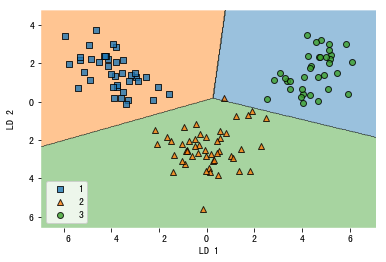

In [16]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train_lda, y_train, clf=lr) 
plt.xlabel('LD 1') 
plt.ylabel('LD 2') 
plt.legend(loc='lower left') 

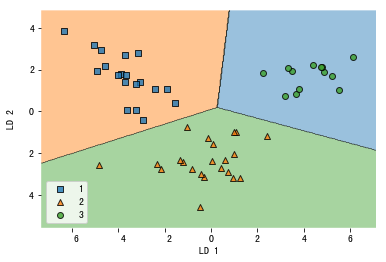

In [17]:
# 在测试集上的表现
X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda, y_test, clf=lr) 
plt.xlabel('LD 1') 
plt.ylabel('LD 2') 
plt.legend(loc='lower left') 